In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [ ]:
df=pd.read_csv('AB_NYC_2019.csv')

In [ ]:
df.shape

(48895, 16)

Each row corresponds to listing activity & metrics in NYC Airbnb. Let's look at first and last few rows of the dataset.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


Let us get a summary of the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#  Cleaning data

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The above table indicates that name(16), host_name(21),last_review(10052) and reviews_per_month(10052) features have missing values. 

So we can fill rows with mean value, which have *reviews_per_month* missing entries and drop name and host_name columns/features as they are not required and of no use.




The missing data and unwanted columns are filled as shown below:

In [ ]:
df.isnull().sum()/len(df) 

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

Descriptive statistics for quantitative features of the dataset can be generated using describe() method as shown below.

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
dfCopy= df.copy(deep=True)


In [ ]:
dfCopy=dfCopy.drop(dfCopy.iloc[:,[1,3]], axis = 1)

In [ ]:
dfCopy.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

# Univariate Analysis

Univariate analysis is one of most common and simplest form of analyzing data. It explores each feature/variable in a data set, separately.

## Numerical Features

Let's take a closer look numerical features on their own and understand them individually.

#### Distribution of price & minimum_nights

Text(0.5, 1.0, 'Distribution of minimum_nights')

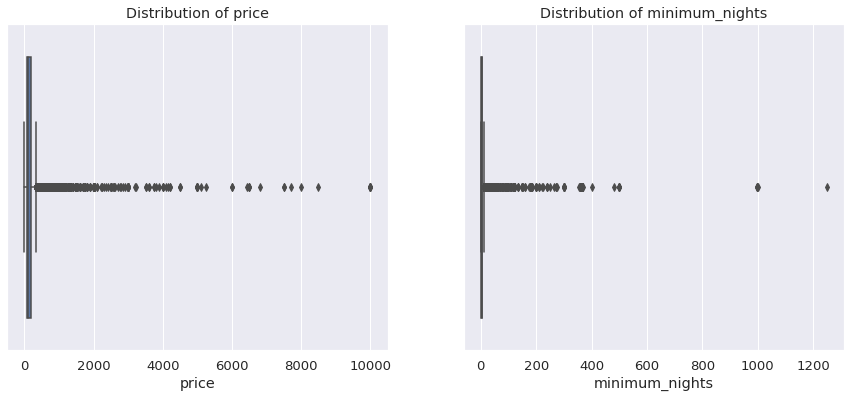

In [ ]:
sns.set(font_scale=1.2, style="darkgrid")

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x=dfCopy['price'])

plt.title("Distribution of price")

plt.subplot(1,2,2)
sns.boxplot(x=dfCopy['minimum_nights'])
plt.title("Distribution of minimum_nights")

* Average `price` for a room in New york is around $152. 
* On an average, A guest stay for 7 `minimum_nights` in NY Airbnb.

#### Availability 365

The below plot gives an overview on availablity of rooms in 365 days, with major destinations are open upto 230 days.

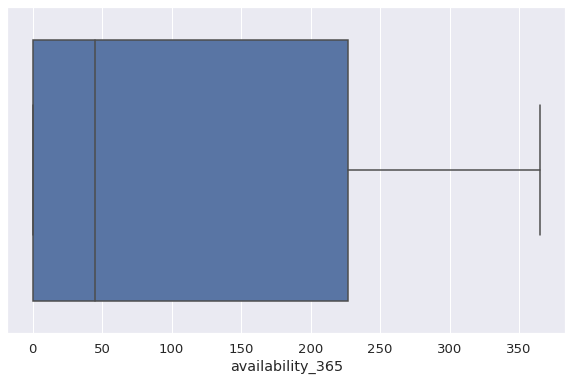

In [ ]:
sns.set(font_scale=1.2, style="darkgrid")

plt.figure(figsize=(10,6))

sns.boxplot(data=dfCopy,x=dfCopy['availability_365'])

## Categorical Features

Let's take a closer look Categorical features on their own and understand them individually.

#### Room Type

([<matplotlib.patches.Wedge at 0x7f2d570ab160>,
 [Text(-0.07408659446990233, 1.1977108067141469, 'Entire home/apt'),
  Text(-0.015304413998788624, -1.1999024022445133, 'Private room'),
  Text(1.1966685154102068, -0.08935582927784572, 'Shared room')],
 [Text(-0.04321718010744303, 0.6986646372499189, '52.0%'),
  Text(-0.008927574832626696, -0.699943067975966, '45.7%'),
  Text(0.6980566339892873, -0.05212423374541, '2.4%')])

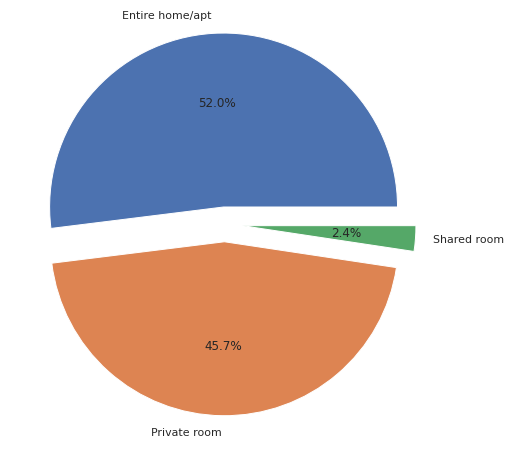

In [ ]:
sns.set(font_scale=1.0, style="darkgrid")
explode=[0.1,0.1,0.1]
plt.figure(figsize=(15,8))
plt.pie(dfCopy.room_type.value_counts(),labels=dfCopy.room_type.value_counts().index.tolist(),explode=explode, autopct='%1.1f%%')

In [ ]:
dfCopy.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Conclusion from the above pie chart as below:

occupancy of *entire_home/apt* ,private_rooms are highest & least is *shared_room* .



#### Host ID

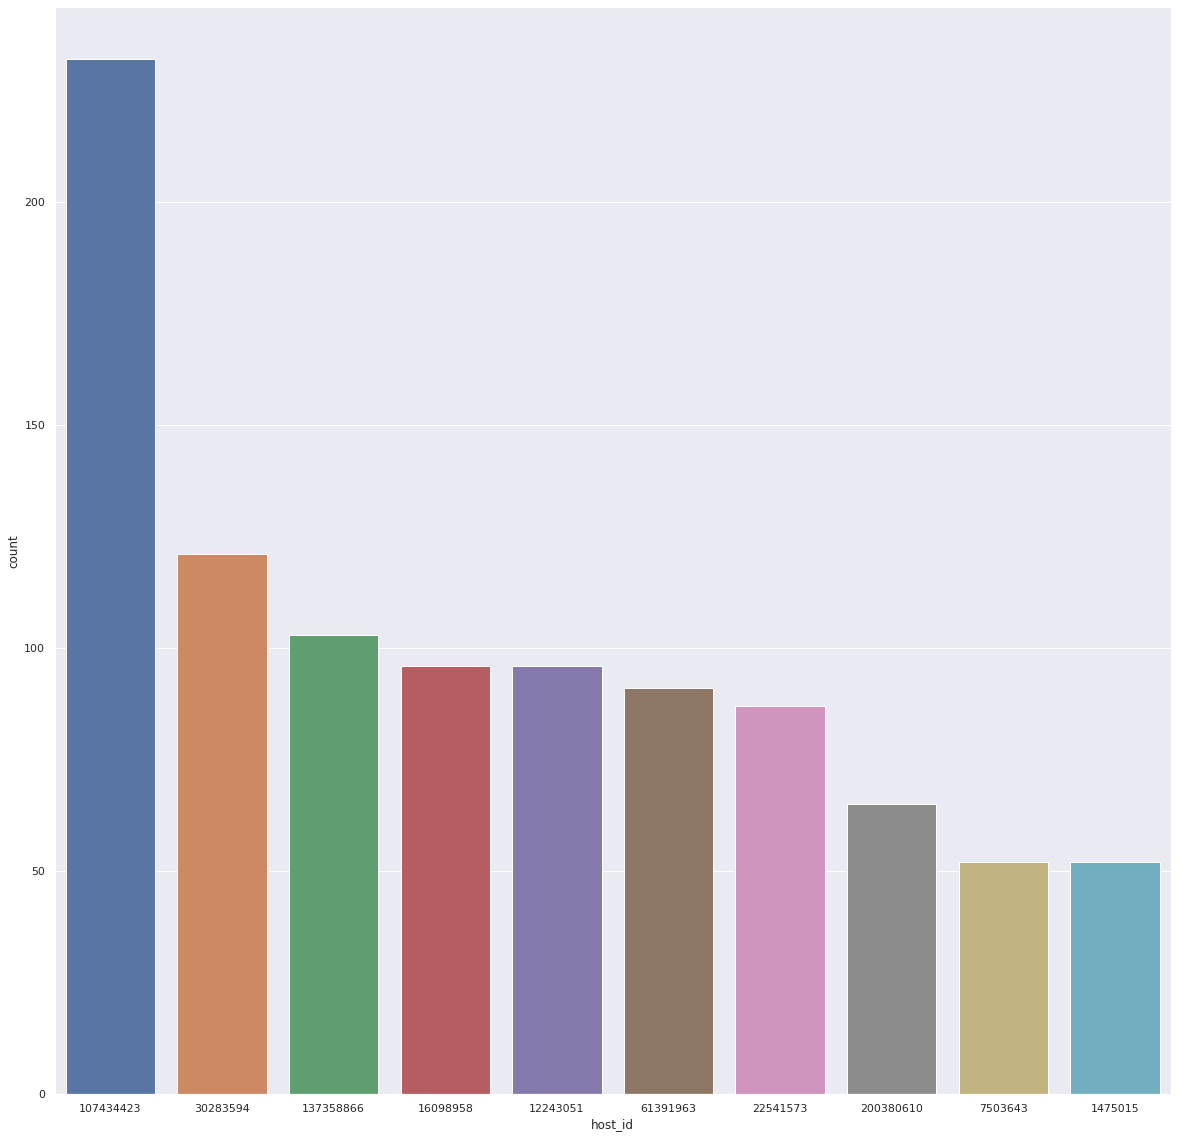

In [ ]:
sns.set(rc={'figure.figsize': [20,20]},font_scale=1.0, style="darkgrid")
sns.countplot(x='host_id',data=df,order=df.host_id.value_counts().iloc[1:11].index)

Host ID 107434423 has the maximum count of listing & least being 1475015

# Bivariate Analysis

Bivariate analysis is an analysis of two variables/features to determine the relationships between them.

## Numerical features

Let us now calculate the correlation matrix for *numerical/quantitative features* and visualize it.


### Reviews

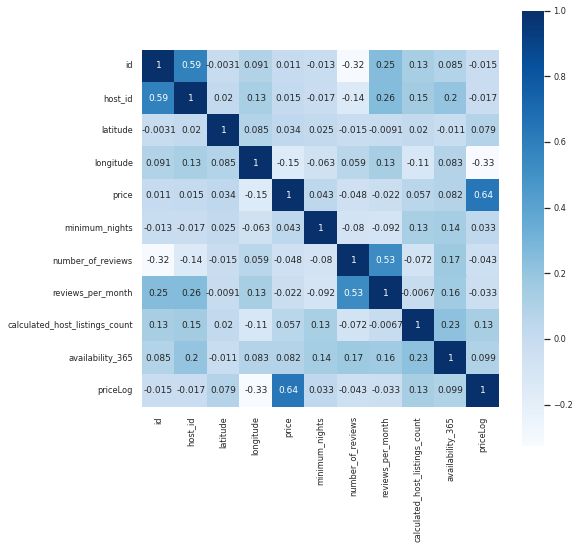

In [ ]:
correlationMatrix= dfCopy.corr()
plt.figure(figsize=(8,8))
sns.set(font_scale = 0.75)
sns.heatmap(correlationMatrix, square = True, annot = True, cmap='Blues')

* Visualization of correlation matrix for numerical features indicates that there is a correlation between the features number_of_reviews & *reviews_per_month*,which is obvious when number of reviews is divided with no of months in year will give us *reviews_per_month*.

* However ,we need to focus on target feature that is price, where price doesnt correlate with any feature.


### Host listings count

Lets find Host listings count based on the neighbourhood group.

In [ ]:
hostareas=dfCopy[['neighbourhood_group','calculated_host_listings_count']]
hostareas.head()

,neighbourhood_group,calculated_host_listings_count
0,Brooklyn,6
1,Manhattan,2
2,Manhattan,1
3,Brooklyn,1
4,Manhattan,1


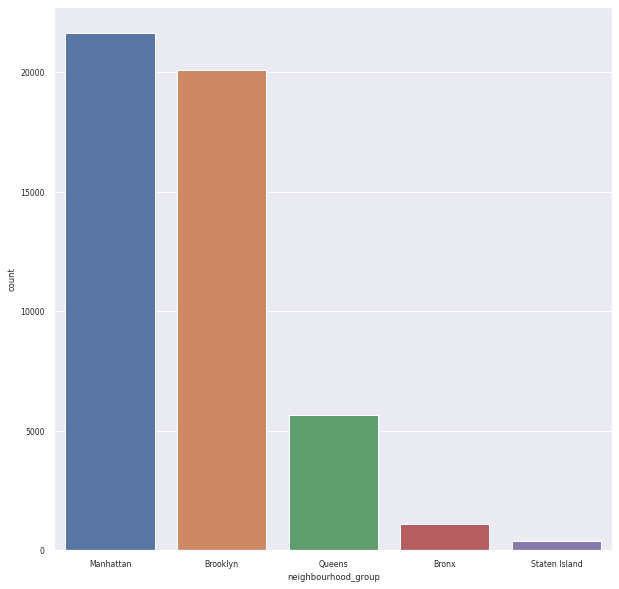

In [ ]:
sns.set(rc={'figure.figsize': [10,10]},font_scale=0.7, style="darkgrid")
sns.countplot(x='neighbourhood_group',data=hostareas,order=hostareas.neighbourhood_group.value_counts().index)

Major count falls in Manhattan & Brooklyn areas with more than and equal to 20000 counts of guest occupancy.

### Minimum Nights & Avalability 365

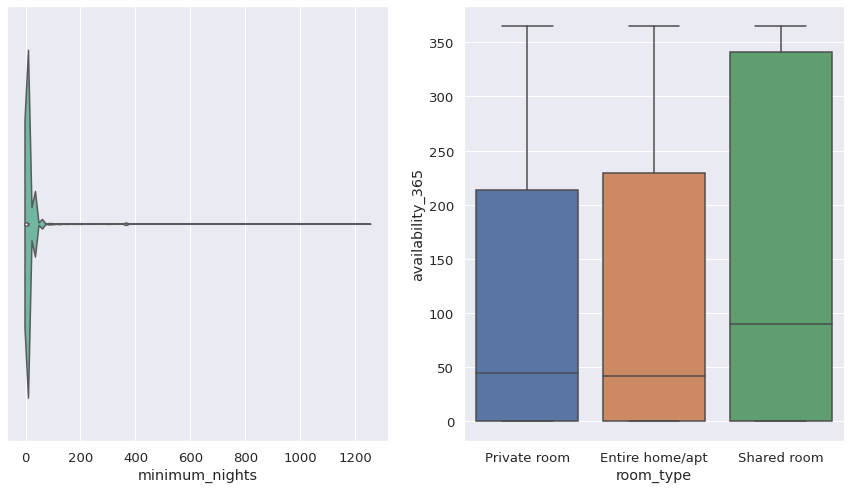

In [ ]:
sns.set(font_scale=1.2, style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)

sns.violinplot(x='minimum_nights',hue='room_type',binwidth=1,data=roomprice,kde=True,palette = 'Set2')


plt.subplot(1,2,2)
sns.boxplot(x='room_type', y='availability_365',data=roomprice)

Shared room avalability is more in the second boxplot visualisation , since there are less customers opting for it.

Also , avalibility of *entire_home/apt* & *private_room* is almost same , as it is more occupied .

## Categorical Features

#### Room type

Looking at different room type occupancy in different neighbourhood_groups, mostly *private_rooms* & *entire_home/
apt* is filled in Manhattan & brooklyn region with lesser stay in Staten island & Bronx city.

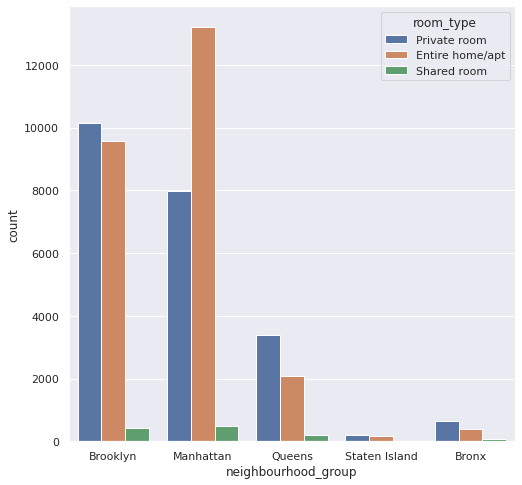

In [ ]:
sns.set(rc={'figure.figsize': [8,8]},font_scale=1.0, style="darkgrid")
sns.countplot(x='neighbourhood_group',hue='room_type',data=dfCopy)

# Target Feature- Price

In [ ]:
roomprice=dfCopy[['room_type','price','minimum_nights','availability_365']]
roomprice.head(10)

,room_type,price,minimum_nights,availability_365
0,Private room,149,1,365
1,Entire home/apt,225,1,355
2,Private room,150,3,365
3,Entire home/apt,89,1,194
4,Entire home/apt,80,10,0
5,Entire home/apt,200,3,129
6,Private room,60,45,0
7,Private room,79,2,220
8,Private room,79,2,0
9,Entire home/apt,150,1,188


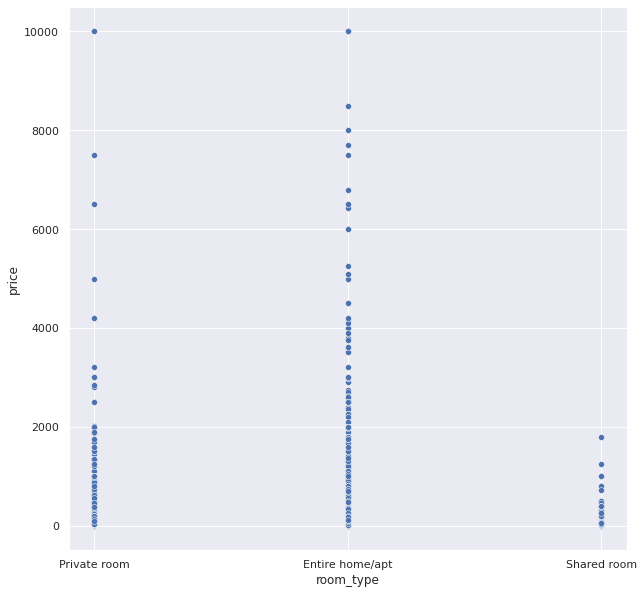

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=roomprice, x='room_type',y='price')

Looking at price variation for different room types.

when compared to entire home & private room shared room price much lesser & entire home price is high.

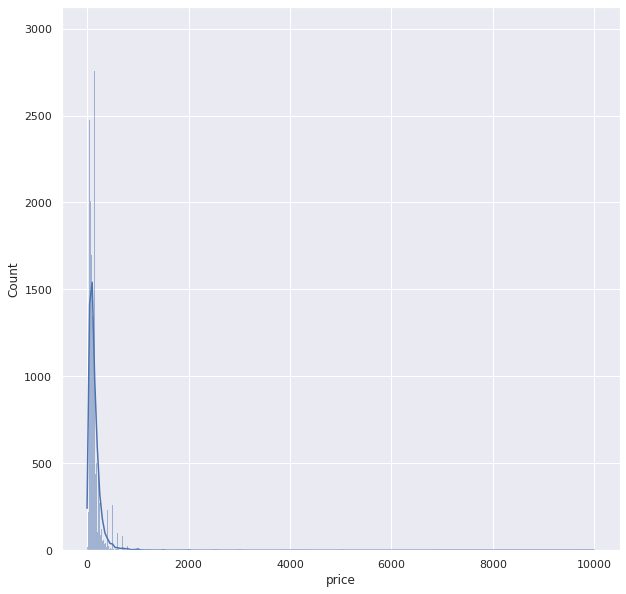

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=dfCopy,x='price',kde=True)

Distribution graph shows that price is a right-skewed distribution (positive skewness).

Applying log (log+1) transformation to price will help to make the feature less skewed.

In [ ]:
dfCopy['priceLog']= np.log(df.price+1)

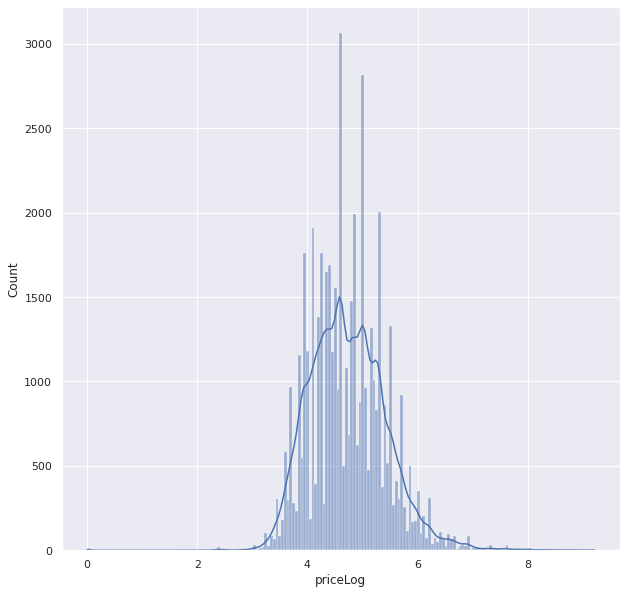

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=dfCopy,x='priceLog',kde=True)

After applying log ,the price shows normal distribution.

In [ ]:
Pricedist = dfCopy[dfCopy['price']<1000]

Pricedist.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,priceLog
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,5.010635
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,5.420535
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365,5.017280
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,4.499810
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,4.394449


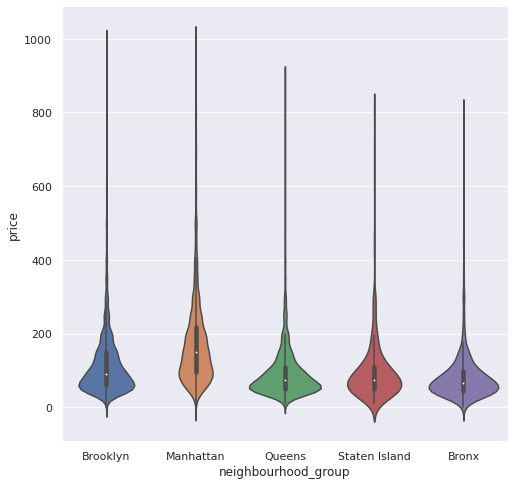

In [ ]:
sns.violinplot(data=Pricedist,x='neighbourhood_group',y='price')

* The above plot show us the price in different neighbourhood group.




In [ ]:
sns.catplot(x='neighbourhood_group',y='price',hue='room_type',kind='swarm',data=Pricedist)

In [ ]:
# check this link https://towardsdatascience.com/violin-plots-explained-fb1d115e023d


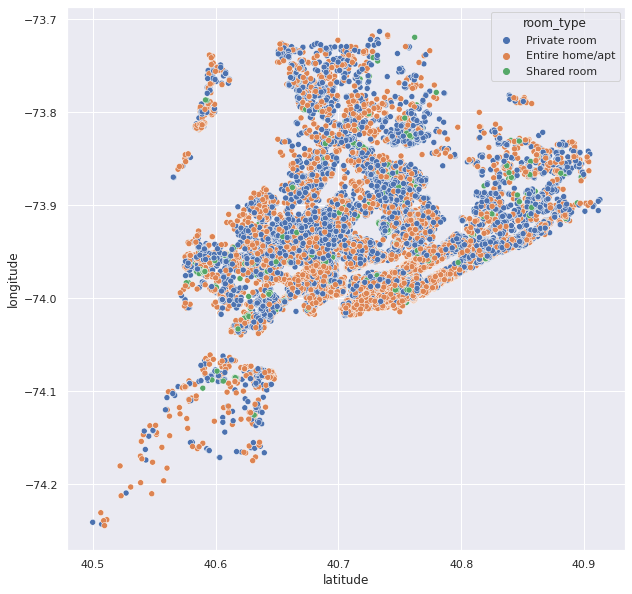

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dfCopy, x='latitude',y='longitude',hue="room_type")

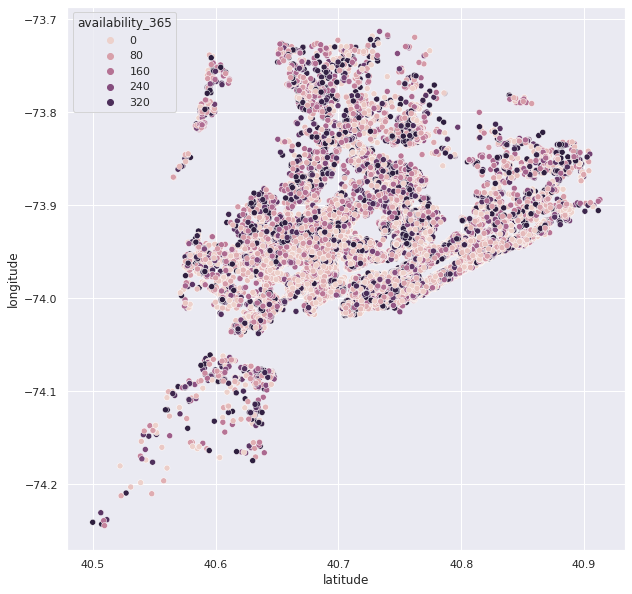

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dfCopy, x='latitude',y='longitude',hue="availability_365")

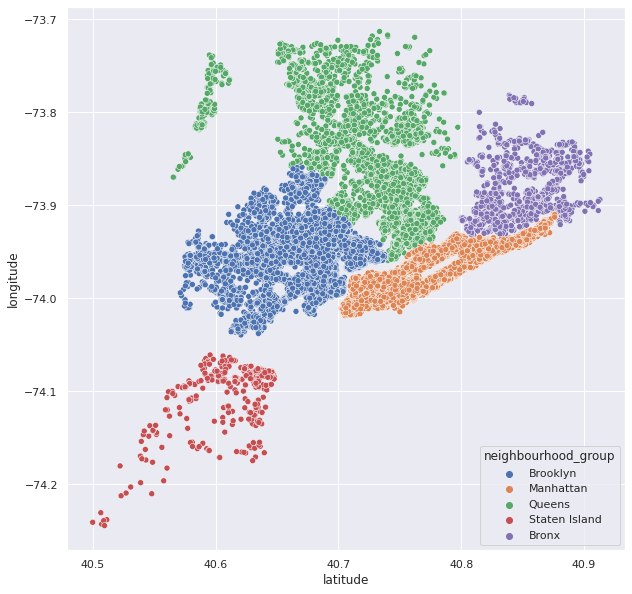

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dfCopy, x='latitude',y='longitude',hue="neighbourhood_group")